In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# helper functions
import cpt_calculator as cpt

To compute the conditional probability tables, we will obesrve each node in a BFS-like fashion, starting with nodes that do not have parents and then working our way through nodes whose parents we have already observed.

# Depth 0 Nodes Without Parents

In [2]:
print("These are the list of parentless nodes :", cpt.get_parentless_nodes(),". We start by defining a function to reduce redundancy.")

These are the list of parentless nodes : ['MONTH', 'DAY_OF_WEEK'] . We start by defining a function to reduce redundancy.


## 1. Month

In [3]:
month_df = cpt.parentless_CPT('MONTH')
month_df

,MONTH,prob,log_p
0,1,0.060724,-2.801424
1,2,0.032300,-3.432696
2,3,0.054264,-2.913902
3,4,0.063307,-2.759752
4,5,0.091731,-2.388892
5,6,0.104651,-2.257123
6,7,0.130491,-2.036451
7,8,0.112403,-2.185664
8,9,0.111111,-2.197225
9,10,0.093023,-2.374906


## 2. Day of Week

In [4]:
day_of_week_df = cpt.parentless_CPT('DAY_OF_WEEK')
day_of_week_df

,DAY_OF_WEEK,prob,log_p
0,1,0.158915,-1.839388
1,2,0.130491,-2.036451
2,3,0.127907,-2.056452
3,4,0.179587,-1.717098
4,5,0.170543,-1.768770
5,6,0.098191,-2.320839
6,7,0.134367,-2.007181


# Depth 1: Nodes with Parents

First, we find all the nodes whose values we can compute based on those nodes whose conditional probability tables we have already computed.

In [5]:
cpt.available_nodes()

['ScheduledArrivalPHL', 'CRS_ARR_TIME']

## 3. CRS Arrival Time

In [6]:
arr_time_df = cpt.nonparentless_CPT('CRS_ARR_TIME')
arr_time_df.head(10)

Note: There are 162 rows in the above table, but we should have 168 , which means that 6 row(s) missing values have been replaced with to occur with probability 2.2250738585072014e-308 .


,MONTH,DAY_OF_WEEK,CRS_ARR_TIME,prob,log_p
0,1,1,0,0.200000,-1.609438
1,1,1,1,0.800000,-0.223144
2,2,1,0,0.500000,-0.693147
3,2,1,1,0.500000,-0.693147
4,3,1,0,0.800000,-0.223144
5,3,1,1,0.200000,-1.609438
6,4,1,0,0.428571,-0.847298
7,4,1,1,0.571429,-0.559616
8,5,1,0,0.250000,-1.386294
9,5,1,1,0.750000,-0.287682


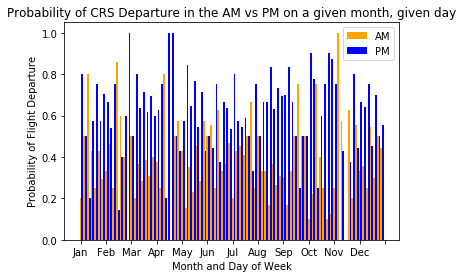

In [7]:
# draw graph of probabilities
arr_am = arr_time_df[arr_time_df.CRS_ARR_TIME == 0]
arr_pm = arr_time_df[arr_time_df.CRS_ARR_TIME == 1]

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec']
legend = ['AM', 'PM']
X = np.arange(84)
plt.bar(X, arr_am.prob, color=['orange'], width = 0.5)
plt.bar(X+0.5, arr_pm.prob, color=['blue'], width = 0.5)
plt.xlabel('Month and Day of Week')
plt.ylabel('Probability of Flight Departure')
plt.legend(legend)
plt.xticks(np.arange(0, 85, 7), months)
plt.title('Probability of CRS Departure in the AM vs PM on a given month, given day')
plt.savefig('CRS_DEP_TIME.png')
plt.show()

## 4. ScheduledArrivalPHL

0 represents less than 10, 1 represents less than 20, 2 represents less than 30, 3 represents less than 40, 4 represents less than 50.

In [8]:
scheduled_PHL_df = cpt.nonparentless_CPT('ScheduledArrivalPHL')
scheduled_PHL_df.head(10)

Note: There are 33 rows in the above table, but we should have 35 , which means that 2 row(s) missing values have been replaced with to occur with probability 2.2250738585072014e-308 .


,DAY_OF_WEEK,ScheduledArrivalPHL,prob,log_p
0,1,0,0.626016,-0.468379
1,2,0,0.673267,-0.395613
2,3,0,0.656566,-0.420733
3,4,0,0.661871,-0.412685
4,5,0,0.636364,-0.451985
5,6,0,0.657895,-0.418710
6,7,0,0.644231,-0.439698
7,1,1,0.260163,-1.346448
8,2,1,0.168317,-1.781907
9,3,1,0.252525,-1.376244


# Depth 2

In [9]:
cpt.available_nodes()

['CRS_DEP_TIME']

## 5. CRS Departure Time

In [10]:
departure_time_df = cpt.nonparentless_CPT('CRS_DEP_TIME')
departure_time_df.head(10)

Note: There are 218 rows in the above table, but we should have 336 , which means that 118 row(s) missing values have been replaced with to occur with probability 2.2250738585072014e-308 .


,MONTH,CRS_ARR_TIME,DAY_OF_WEEK,CRS_DEP_TIME,prob,log_p
0,1,0,1,0,2.225074e-308,-708.396419
1,1,0,1,1,1.000000e+00,0.000000
2,1,0,2,0,2.225074e-308,-708.396419
3,1,0,2,1,1.000000e+00,0.000000
4,1,0,3,0,2.225074e-308,-708.396419
5,1,0,3,1,2.225074e-308,-708.396419
6,1,0,4,0,2.225074e-308,-708.396419
7,1,0,4,1,1.000000e+00,0.000000
8,1,0,5,0,2.225074e-308,-708.396419
9,1,0,5,1,1.000000e+00,0.000000


# Depth 3

In [11]:
cpt.available_nodes()

['ScheduledDepartureSFO']

## 6. Number of Scheduled Departures from SFO

In [12]:
scheduled_SFO_df = cpt.nonparentless_CPT('ScheduledDepartureSFO')
scheduled_SFO_df.head(10)

Note: There are 167 rows in the above table, but we should have 1200 , which means that 1033 row(s) missing values have been replaced with to occur with probability 2.2250738585072014e-308 .


,MONTH,CRS_ARR_TIME,CRS_DEP_TIME,ScheduledArrivalPHL,ScheduledDepartureSFO,prob,log_p
0,1,0,0,0,0,2.225074e-308,-708.396419
1,1,0,0,0,1,2.225074e-308,-708.396419
2,1,0,0,0,2,2.225074e-308,-708.396419
3,1,0,0,0,3,2.225074e-308,-708.396419
4,1,0,0,0,4,2.225074e-308,-708.396419
5,1,0,0,1,0,2.225074e-308,-708.396419
6,1,0,0,1,1,2.225074e-308,-708.396419
7,1,0,0,1,2,2.225074e-308,-708.396419
8,1,0,0,1,3,2.225074e-308,-708.396419
9,1,0,0,1,4,2.225074e-308,-708.396419


# Depth 4

In [13]:
cpt.available_nodes()

['LATE_AIRCRAFT_DELAY', 'DelayedDepartureSFO']

## 7. Delayed Departure SFO

In [14]:
delayed_SFO_df = cpt.nonparentless_CPT('DelayedDepartureSFO')
delayed_SFO_df.head(10)

Note: There are 13 rows in the above table, but we should have 50 , which means that 37 row(s) missing values have been replaced with to occur with probability 2.2250738585072014e-308 .


,ScheduledDepartureSFO,ScheduledArrivalPHL,DelayedDepartureSFO,prob,log_p
0,0,0,0,1.000000e+00,0.000000
1,0,0,1,2.225074e-308,-708.396419
2,1,0,0,2.225074e-308,-708.396419
3,1,0,1,2.225074e-308,-708.396419
4,2,0,0,2.225074e-308,-708.396419
5,2,0,1,2.225074e-308,-708.396419
6,3,0,0,2.225074e-308,-708.396419
7,3,0,1,2.225074e-308,-708.396419
8,4,0,0,7.250000e-01,-0.321584
9,4,0,1,2.750000e-01,-1.290984


## 8. Late Aircraft Delay

In [15]:
late_aircraft_delay_df = cpt.nonparentless_CPT('LATE_AIRCRAFT_DELAY')
late_aircraft_delay_df.head(10)

Note: There are 33 rows in the above table, but we should have 40 , which means that 7 row(s) missing values have been replaced with to occur with probability 2.2250738585072014e-308 .


,CRS_DEP_TIME,ScheduledDepartureSFO,CRS_ARR_TIME,LATE_AIRCRAFT_DELAY,prob,log_p
0,0,0,0,0,1.000000e+00,0.000000
1,0,0,0,1,2.225074e-308,-708.396419
2,0,0,1,0,8.543689e-01,-0.157392
3,0,0,1,1,1.456311e-01,-1.926679
4,1,0,0,0,7.722772e-01,-0.258412
5,1,0,0,1,2.277228e-01,-1.479626
6,1,0,1,0,5.116279e-01,-0.670158
7,1,0,1,1,4.883721e-01,-0.716678
8,0,1,0,0,1.000000e+00,0.000000
9,0,1,0,1,2.225074e-308,-708.396419


# Depth 5

In [16]:
cpt.available_nodes()

['NAS_DELAY']

## 9. NAS Delay

In [17]:
nas_delay_df = cpt.nonparentless_CPT('NAS_DELAY')
nas_delay_df.head(10)

Note: There are 15 rows in the above table, but we should have 16 , which means that 1 row(s) missing values have been replaced with to occur with probability 2.2250738585072014e-308 .


,CRS_DEP_TIME,DelayedDepartureSFO,CRS_ARR_TIME,NAS_DELAY,prob,log_p
0,0,0,0,0,7.692308e-01,-0.262364
1,0,0,0,1,2.307692e-01,-1.466337
2,0,0,1,0,6.230769e-01,-0.473085
3,0,0,1,1,3.769231e-01,-0.975714
4,1,0,0,0,6.279070e-01,-0.465363
5,1,0,0,1,3.720930e-01,-0.988611
6,1,0,1,0,6.206897e-01,-0.476924
7,1,0,1,1,3.793103e-01,-0.969401
8,0,1,0,0,1.000000e+00,0.000000
9,0,1,0,1,2.225074e-308,-708.396419


# Depth 6

In [18]:
cpt.available_nodes()

['WEATHER_DELAY', 'TAXI_IN']

## 10. Taxi In

In [19]:
taxi_in_df = cpt.nonparentless_CPT('TAXI_IN')
taxi_in_df.head(10)

Note: There are 22 rows in the above table, but we should have 104 , which means that 82 row(s) missing values have been replaced with to occur with probability 2.2250738585072014e-308 .


,DelayedDepartureSFO,NAS_DELAY,CRS_ARR_TIME,TAXI_IN,prob,log_p
0,0,0,0,0,9.418605e-01,-0.059898
1,0,0,0,1,5.232558e-02,-2.950270
2,0,0,0,2,5.813953e-03,-5.147494
3,0,0,0,3,2.225074e-308,-708.396419
4,0,0,0,4,2.225074e-308,-708.396419
5,0,0,0,5,2.225074e-308,-708.396419
6,0,0,0,6,2.225074e-308,-708.396419
7,0,0,0,7,2.225074e-308,-708.396419
8,0,0,0,8,2.225074e-308,-708.396419
9,0,0,0,9,2.225074e-308,-708.396419


## 11. Weather Delay

In [20]:
weather_delay_df = cpt.nonparentless_CPT('WEATHER_DELAY')
weather_delay_df.head(10)

,NAS_DELAY,WEATHER_DELAY,prob,log_p
0,0,0,0.997942,-0.002060
1,0,1,0.002058,-6.186209
2,1,0,0.989583,-0.010471
3,1,1,0.010417,-4.564348


# Depth 7

In [21]:
cpt.available_nodes()

['CARRIER_DELAY']

## 12. Carrier Delay

In [22]:
carrier_delay_df = cpt.nonparentless_CPT('CARRIER_DELAY')
carrier_delay_df.head(10)

Note: There are 11 rows in the above table, but we should have 16 , which means that 5 row(s) missing values have been replaced with to occur with probability 2.2250738585072014e-308 .


,CRS_DEP_TIME,CRS_ARR_TIME,WEATHER_DELAY,CARRIER_DELAY,prob,log_p
0,0,0,0,0,9.411765e-01,-0.060625
1,0,0,0,1,5.882353e-02,-2.833213
2,0,0,1,0,2.225074e-308,-708.396419
3,0,0,1,1,2.225074e-308,-708.396419
4,1,0,0,0,7.116788e-01,-0.340129
5,1,0,0,1,2.883212e-01,-1.243680
6,1,0,1,0,1.000000e+00,0.000000
7,1,0,1,1,2.225074e-308,-708.396419
8,0,1,0,0,8.048193e-01,-0.217138
9,0,1,0,1,1.951807e-01,-1.633829


# Depth 8

In [23]:
cpt.available_nodes()

['ARR_DEL15', 'DEP_DELAY']

## 13. Departure Delay

In [24]:
dep_delay_df = cpt.nonparentless_CPT('DEP_DELAY')
dep_delay_df.head(10)

Note: There are 460 rows in the above table, but we should have 2016 , which means that 1556 row(s) missing values have been replaced with to occur with probability 2.2250738585072014e-308 .


,LATE_AIRCRAFT_DELAY,CRS_ARR_TIME,DAY_OF_WEEK,MONTH,CARRIER_DELAY,DEP_DELAY,prob,log_p
0,0,0,1,1,0,0,5.000000e-01,-0.693147
1,0,0,1,1,0,1,2.225074e-308,-708.396419
2,0,0,1,1,0,-1,5.000000e-01,-0.693147
3,0,0,1,1,1,0,2.225074e-308,-708.396419
4,0,0,1,1,1,1,2.225074e-308,-708.396419
5,0,0,1,1,1,-1,2.225074e-308,-708.396419
6,0,0,1,2,0,0,2.225074e-308,-708.396419
7,0,0,1,2,0,1,1.000000e+00,0.000000
8,0,0,1,2,0,-1,2.225074e-308,-708.396419
9,0,0,1,2,1,0,2.225074e-308,-708.396419


## 14. Arrival Delay

In [25]:
arr_del15_df = cpt.nonparentless_CPT('ARR_DEL15')
arr_del15_df.head(10)

Note: There are 114 rows in the above table, but we should have 640 , which means that 526 row(s) missing values have been replaced with to occur with probability 2.2250738585072014e-308 .


,NAS_DELAY,LATE_AIRCRAFT_DELAY,CRS_DEP_TIME,ScheduledDepartureSFO,DelayedDepartureSFO,CRS_ARR_TIME,CARRIER_DELAY,ARR_DEL15,prob,log_p
0,0,0,0,0,0,0,0,0,1.000000e+00,0.000000
1,0,0,0,0,0,0,0,1,2.225074e-308,-708.396419
2,0,0,0,0,0,0,1,0,2.225074e-308,-708.396419
3,0,0,0,0,0,0,1,1,2.225074e-308,-708.396419
4,0,0,0,0,0,1,0,0,1.000000e+00,0.000000
5,0,0,0,0,0,1,0,1,2.225074e-308,-708.396419
6,0,0,0,0,0,1,1,0,2.225074e-308,-708.396419
7,0,0,0,0,0,1,1,1,1.000000e+00,0.000000
8,0,0,0,0,1,0,0,0,2.225074e-308,-708.396419
9,0,0,0,0,1,0,0,1,2.225074e-308,-708.396419


# Testing Some Values

In [26]:
def find_logp(obs, df):
    on_li = df.columns.tolist()[:-2]
    return pd.merge(df, obs, on=on_li, how='inner').iloc[0].log_p

def compute_probability(obs):
    dfs = [month_df, day_of_week_df, arr_time_df, scheduled_PHL_df, departure_time_df, scheduled_SFO_df, \
          delayed_SFO_df, late_aircraft_delay_df, nas_delay_df, taxi_in_df, weather_delay_df, carrier_delay_df, \
          dep_delay_df,arr_del15_df]
    vals = [find_logp(obs, df) for df in dfs]
    return np.exp(sum(vals))

In [27]:
test_df = pd.read_csv('./test_data.csv')
y_test = pd.DataFrame(test_df.ARR_DEL15.astype('int', copy=False)).astype(int)
y_test['probability'] = [compute_probability(pd.DataFrame(test_df.iloc[i].transpose()).transpose()) \
                         for i in range(test_df.shape[0])]

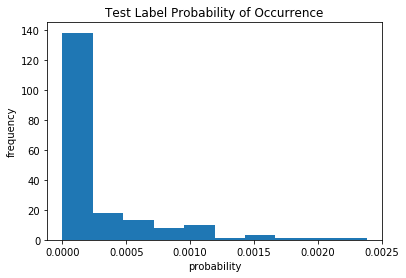

In [28]:
plt.hist(y_test.probability)
plt.xlabel('probability')
plt.ylabel('frequency')
plt.title('Test Label Probability of Occurrence')
plt.savefig('probability_histogram.png')
plt.show()

In [29]:
y_test0 = y_test[y_test.ARR_DEL15 == 0]
y_test1 = y_test[y_test.ARR_DEL15 == 1]

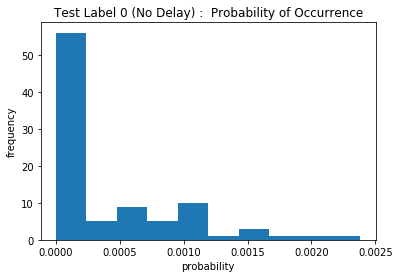

In [30]:
plt.hist(y_test0.probability)
plt.xlabel('probability')
plt.ylabel('frequency')
plt.title('Test Label 0 (No Delay) :  Probability of Occurrence')
plt.savefig('label0_probability.png')
plt.show()

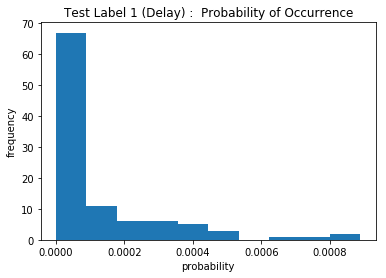

In [31]:
plt.hist(y_test1.probability)
plt.xlabel('probability')
plt.ylabel('frequency')
plt.title('Test Label 1 (Delay) :  Probability of Occurrence')
plt.savefig('label1_probability.png')
plt.show()

In [32]:
y_test0.probability.describe()

count     9.200000e+01
mean      3.953393e-04
std       5.369724e-04
min       0.000000e+00
25%      1.592654e-311
50%       1.350086e-04
75%       6.336540e-04
max       2.383024e-03
Name: probability, dtype: float64

In [33]:
y_test1.probability.describe()

count     1.020000e+02
mean      1.151955e-04
std       1.916807e-04
min       0.000000e+00
25%      1.062539e-312
50%       2.522886e-07
75%       1.703659e-04
max       8.895899e-04
Name: probability, dtype: float64